In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Ler o novo conjunto de dados
url = 'https://raw.githubusercontent.com/Orlandi-a11/datasets/main/Dados_Bancarios.csv'
dados = pd.read_csv(url, sep = ';')
# Exibir as primeiras 5 linhas do novo conjunto de dados
dados.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:

# Pré-processamento dos dados (adapte conforme necessário)
# Exemplo de pré-processamento: converter colunas categóricas em one-hot encoding
dados = pd.get_dummies(dados, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])


In [ ]:
# Filtrar os dados com base em um determinado valor de "balance"
balance_threshold = 2000
dados = dados[dados['balance'] > balance_threshold]

In [ ]:
# Selecionamos colunas relevantes para análise
selected_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
dados_selected = dados[selected_columns]
dados_selected.head(5)

,age,balance,day,duration,campaign,pdays,previous
1,33,4789,11,220,1,339,4
10,39,9374,20,273,1,-1,0
16,56,4073,27,239,5,-1,0
17,37,2317,20,114,1,152,2
25,41,5883,20,182,2,-1,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


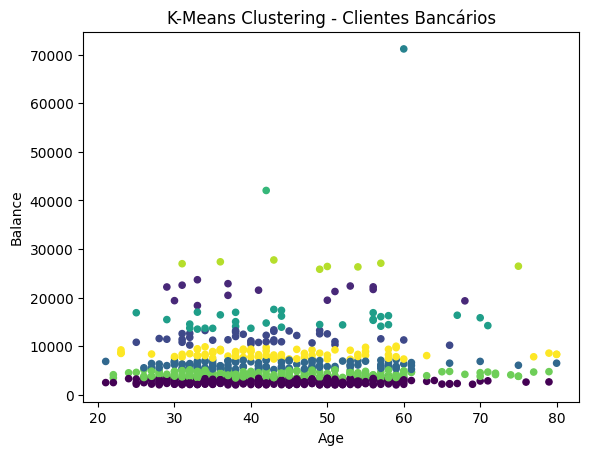

In [ ]:
# Aplicação do K-Means
model_bank = KMeans(n_clusters=10)
model_bank.fit(dados_selected)
group_bank = model_bank.predict(dados_selected)
# Visualização dos resultados usando gráfico de dispersão
plt.scatter(dados_selected['age'],dados_selected['balance'], c=group_bank, cmap='viridis', s=20)
plt.title('K-Means Clustering - Clientes Bancários')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

In [ ]:
# Aplicação do PCA
pca_bank = PCA(n_components=3)
pca_array_bank = pca_bank.fit_transform(dados_selected)

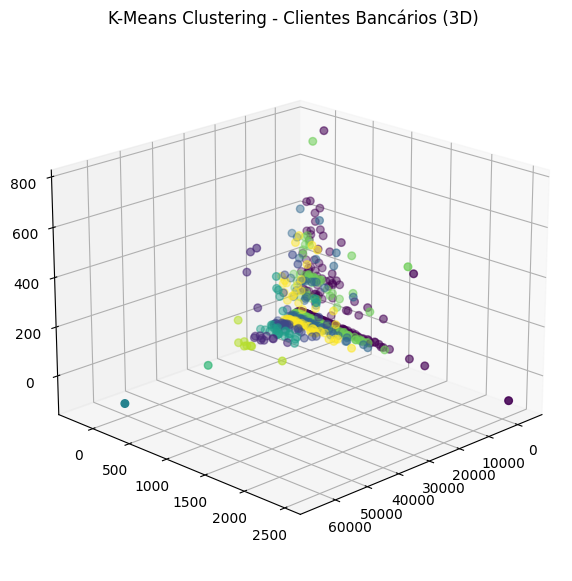

In [ ]:

# Visualização dos resultados em 3D com ajustes de alinhamento
fig_bank = plt.figure(figsize=(10, 7))
ax_bank = fig_bank.add_subplot(111, projection='3d')
sc = ax_bank.scatter(pca_array_bank[:, 0], pca_array_bank[:, 1], pca_array_bank[:, 2], c=group_bank, cmap='viridis', s=30)
ax_bank.set_title('K-Means Clustering - Clientes Bancários (3D)')
# Ajustes para melhorar o alinhamento
ax_bank.view_init(elev=20, azim=45)
plt.show()